In [ ]:
# Importing the Necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_auc_score, f1_score

In [ ]:
df=pd.read_csv('/content/Training.csv')

In [ ]:
# Calling the dataset to view the columns and rows
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
# Let's check how many rows and columns are in the dataset
df.shape

(4920, 133)

In [ ]:
# checking for missing values in the dataset
df.isnull().sum().sum()

0

In [ ]:
# checking for unique disease in the prognosis column
df['prognosis'].nunique()

41

In [ ]:
# checking for the columns in the dataset
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
 # Encoding the prognosis column
one_hot_encoded_df = pd.get_dummies(df['prognosis'])

# Step 2: Map the encoded integers back to the original DataFrame
encoded_mapping = {prognosis: i for i, prognosis in enumerate(one_hot_encoded_df.columns)}
df['disease'] = df['prognosis'].map(encoded_mapping)

In [ ]:
df.tail(300)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,disease
4620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles),13
4621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Heart attack,18
4622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Varicose veins,39
4623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hypothyroidism,26
4624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hyperthyroidism,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,35


In [ ]:
# Let's count the each disease as see their number of occurence
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [ ]:
# so let's indicate which disease is which after been encoded
"""
  0 =(vertigo) Paroymsal Positional Vertigo
  1=AIDS
  2=Acne
  3=Alcoholic hepatitis
  4=Allergy
  5=Arthritis
  6=Bronchial Asthma
  7=Cervical spondylosis
  8=Chicken pox
  9=Chronic cholestasis
  10=Common Cold
  11=Dengue
  12=Diabetes
  13=Dimorphic hemmorhoids(piles)
  14=Drug Reaction
  15=Fungal infection
  16=GERD
  17=Gastroenteritis
  18=Heart attack
  19=Hepatitis B
  20=Hepatitis C
  21=Hepatitis D
  22=Hepatitis E
  23=Hypertension
  24=Hyperthyroidism
  25=Hypoglycemia
  26=Hypothyroidism
  27=Impetigo
  28=Jaundice
  29=Malaria
  30=Migraine
  31=Osteoarthristis
  32=Paralysis (brain hemorrhage)
  33=Peptic ulcer diseae
  34=Pneumonia
  35=Psoriasis
  36=Tuberculosis
  37=Typhoid
  38=Urinary tract infection
  39=Varicose veins
  40=hepatitis A
"""

'\n  0 =(vertigo) Paroymsal Positional Vertigo\n  1=AIDS\n  2=Acne\n  3=Alcoholic hepatitis\n  4=Allergy\n  5=Arthritis\n  6=Bronchial Asthma\n  7=Cervical spondylosis\n  8=Chicken pox\n  9=Chronic cholestasis\n  10=Common Cold\n  11=Dengue\n  12=Diabetes\n  13=Dimorphic hemmorhoids(piles)\n  14=Drug Reaction\n  15=Fungal infection\n  16=GERD\n  17=Gastroenteritis\n  18=Heart attack\n  19=Hepatitis B\n  20=Hepatitis C\n  21=Hepatitis D\n  22=Hepatitis E\n  23=Hypertension\n  24=Hyperthyroidism\n  25=Hypoglycemia\n  26=Hypothyroidism\n  27=Impetigo\n  28=Jaundice\n  29=Malaria\n  30=Migraine\n  31=Osteoarthristis\n  32=Paralysis (brain hemorrhage)\n  33=Peptic ulcer diseae\n  34=Pneumonia\n  35=Psoriasis\n  36=Tuberculosis\n  37=Typhoid\n  38=Urinary tract infection\n  39=Varicose veins\n  40=hepatitis A\n'

In [ ]:
# Let's carryout Exploratory Analysis on the dataset
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,20.000000
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,11.833362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


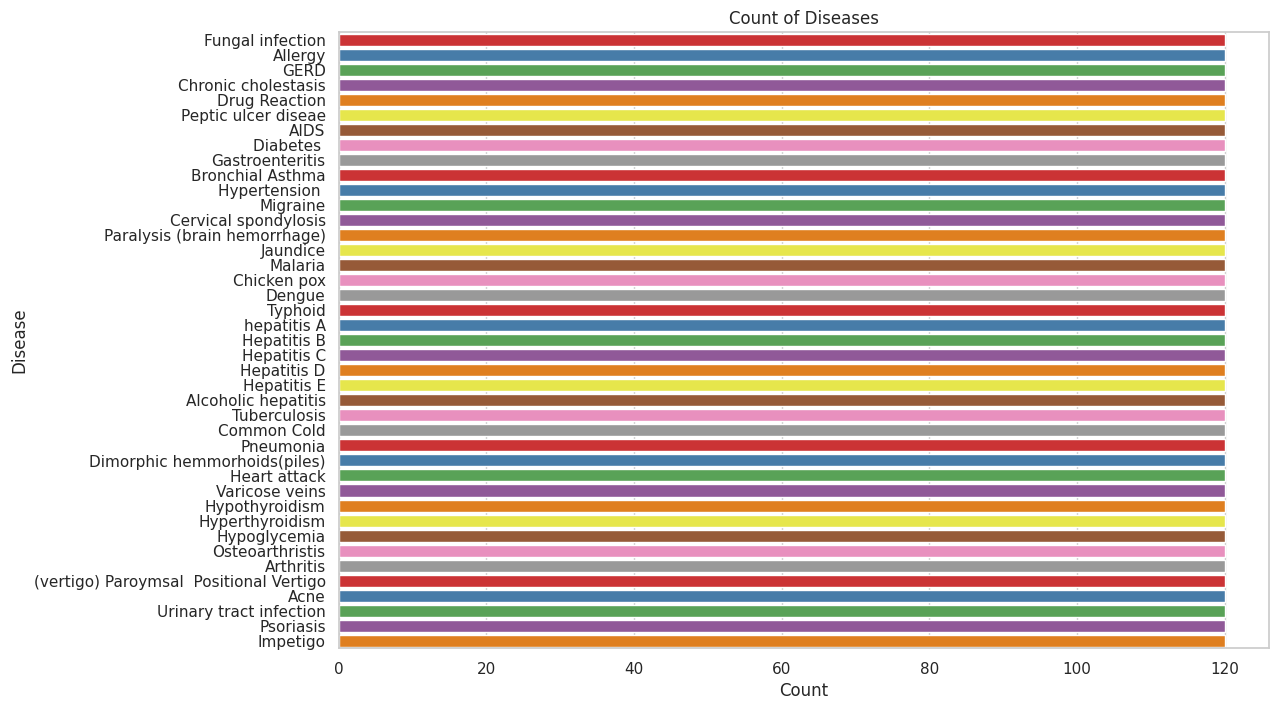

In [ ]:

sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(12, 8))
sns.countplot(y='prognosis', data=df, palette='Set1')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.title('Count of Diseases')
plt.show()

In [ ]:
# The count plot above shows that each disease in the dataset occurs 120 times

In [ ]:
# Dropping the prognosis column
df.drop('prognosis', axis=1, inplace=True)

In [ ]:
# let's find the correlation between the symptoms and the diseases
df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.151898
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,-0.146564
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.063307
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.237346
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.202584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.195249
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.091116
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.091116
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.091116


In [ ]:
# Feature spliting
x = df.drop('disease', axis=1)
y = df['disease']


In [ ]:
# Let's do same for x
print(x)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [ ]:
# Let's do same for y
print(y)

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: disease, Length: 4920, dtype: int64


In [ ]:
# Spliting the dataset into train and test data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.1, stratify=y, random_state=2)
x_train.to_csv("X_train.csv", index = False)
x_test.to_csv("X_test.csv", index = False)
y_train.to_csv("y_train.csv", index = False)
y_test.to_csv("y_test.csv", index = False)

In [ ]:
# lets' check the size of the x_train, x_test, y_train and y_test
print("The shape of the x train is",x_train.shape)
print("The shape of the x test is", x_test.shape)
print("The shape of the y train is", y_train.shape)
print("The shape of the y test is", y_test.shape)

The shape of the x train is (4428, 132)
The shape of the x test is (492, 132)
The shape of the y train is (4428,)
The shape of the y test is (492,)


In [ ]:
# Importing the machine learning algorithm for the drug recommendation model training
model1=DecisionTreeClassifier()
model2=GradientBoostingClassifier()
model3=AdaBoostClassifier()

# This means that whenever model 1 is called, we mean Decision Tree Classifier
# This means that whenever mode2 1 is called, we mean Gradient Boosting Classifier
# This means that whenever model2 is called, we mean Ada Boost Classifier


MODEL1: DECISION TREE CLASSIFIER

In [ ]:
# Training the Decision Tree model
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the diseases using the x_train (using Traing Data)
model1_train_pred=model1.predict(x_train)
mdel1_train_accu = accuracy_score(model1_train_pred, y_train)
print("The accuracy score for the Decision tree training data is:", mdel1_train_accu )

# From the result shown below, the Decision Tree Classifier gives 100% accuracy on the training data

The accuracy score for the Decision tree training data is: 1.0


In [ ]:
# Let's use classification report to evaluate the result of the decision tree classifier
report = classification_report(y_train, model1_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00       108
           4       1.00      1.00      1.00       108
           5       1.00      1.00      1.00       108
           6       1.00      1.00      1.00       108
           7       1.00      1.00      1.00       108
           8       1.00      1.00      1.00       108
           9       1.00      1.00      1.00       108
          10       1.00      1.00      1.00       108
          11       1.00      1.00      1.00       108
          12       1.00      1.00      1.00       108
          13       1.00      1.00      1.00       108
          14       1.00      1.00      1.00       108
          15       1.00      1.00      1.00       108
          16       1.00      1.00      1.00       108
          17       1.00    

In [ ]:
# let's evaluate the model using the test data
model1_test_pred =model1.predict(x_test)
model1_test_accu = accuracy_score(model1_test_pred, y_test)
print("The accuracy score for the Decision tree test data is:", model1_test_accu )

# The test result of the decision tree classifier shows 100% accuracy

The accuracy score for the Decision tree test data is: 1.0


In [ ]:
# let's run the classification report on the Decision tree test data
report = classification_report(y_test, model1_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        12
          17       1.00    

From the Decision Tree Classifier Model Training and Testing, the algorithm shows 100% accuaracy both on training and testing data

MODEL2: GRADIENT BOOSTING CLASSIFIER

In [ ]:
# Training the Gradient Boosting Classifier Model
model2.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predicting the diseases using the x_train (using Traing Data)
model2_train_pred=model2.predict(x_train)
mdel2_train_accu = accuracy_score(model2_train_pred, y_train)
print("The accuracy score for the Decision tree training data is:", mdel2_train_accu )

# From the result shown below, the Gradient Boosting Classifier gives 100% accuracy on the training data

The accuracy score for the Decision tree training data is: 1.0


In [ ]:
# Let's use classification report to evaluate the result of the Gradient Boosting  classifier
report = classification_report(y_train, model2_train_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108
           2       1.00      1.00      1.00       108
           3       1.00      1.00      1.00       108
           4       1.00      1.00      1.00       108
           5       1.00      1.00      1.00       108
           6       1.00      1.00      1.00       108
           7       1.00      1.00      1.00       108
           8       1.00      1.00      1.00       108
           9       1.00      1.00      1.00       108
          10       1.00      1.00      1.00       108
          11       1.00      1.00      1.00       108
          12       1.00      1.00      1.00       108
          13       1.00      1.00      1.00       108
          14       1.00      1.00      1.00       108
          15       1.00      1.00      1.00       108
          16       1.00      1.00      1.00       108
          17       1.00    

In [ ]:
# let's evaluate the model using the test data
model2_test_pred =model1.predict(x_test)
model2_test_accu = accuracy_score(model2_test_pred, y_test)
print("The accuracy score for the Decision tree test data is:", model2_test_accu )

# The test result of the Gradient Boosting classifier shows 100% accuracy

The accuracy score for the Decision tree test data is: 1.0


PERFORMING CROSS VALIDATION ON EACH MODEL

In [ ]:
# Model1: DECISION TREE CLASSIFIER CROSS VALIDATION
# Carrying out cross validation using the K-fold method
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(model1, x_train, y_train, cv=kf)
print('The cross validation score for Decision Tree Classifier is: ', cv_scores, '\n')
print('The mean cross validation score for the Decision tree classifier is: ', cv_scores.mean())

The cross validation score for Decision Tree Classifier is:  [1. 1. 1. 1. 1.] 

The mean cross validation score for the Decision tree classifier is:  1.0


EXPORTING  THE PREDICTIVE MODEL AS A PICKLE FILE FOR DEPLOYMENT

In [ ]:
import pickle
# Saving the model as a pickle object

In [ ]:
with open('drugRecommendation_model.sav', 'wb') as file:
  pickle.dump(model1, file)

In [ ]:
# Loading the served model
load_model= pickle.load(open('drugRecommendation_model.sav', 'rb'))